# Using `Romeo.jl` to Simulate Linear, Time-Invariant Systems

Classical control theory is equipped with a fantastic set of tools. They are powerful, yet intuitive. They are applicable in numerous areas of science and technology, from control theory and signal processing on one end, to system-theoretic considerations in biology and social sciences on the other.

However, powerful as they may be, those classical tools loose some of their appeal when applied to general linear stationary systems, i.e. to systems of infinite order such as retarded systems, distributed parameter systems, fractional order systems, etc. 

**The main goal of `Romeo.jl` is to incorporate design tools, methodologies and principles used within the classical control theory and extend them seamlessly to arbitrary (including infinite-dimensional) linear, stationary systems.**

The aim of this notebook is to demonstrate basic capabilities of `Romeo` in the context of classical, rational (finite-dimensional) LTI systems.

## Preparation

In order to use `Romeo.jl` in your code, include `Romeo.LTI` package into your code using the conventional `using` statement.

In [1]:
using Romeo.LTI

In the sequel, we will plot a lot. Let us also include `Plots`.

In [2]:
using Plots


(process:22912): GLib-GIO-WARNING **: 15:30:51.867: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.2.12.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 46 extensions but has no verbs


## The differentiation operator: `Diff`

The basic operator in `Romeo` is the differentiation operator: `Diff`. It can be of arbitrary order: integer, rational, irrational, and even complex. If we neglect initial condition, which we will do here, the first order differentiation operator corresponds to the `Laplace operator` `s`. Let us define it in that way:

In [3]:
s = Diff(1)

Diff{Int64}(1)

`Diff(1)` is the differentiation operator of order `1`. 

The differentiation operator has its own type in `Romeo`: `Diff{T<:Number}`. This type is parameterized by the order data type, which here defaults to 64-bit integer. Normally, the user of `Romeo` should not care about this underlying type: in most cases it is an irrelevant implementation detail. 

Off course, it is possible to simulate response of a system to an arbitrary input:

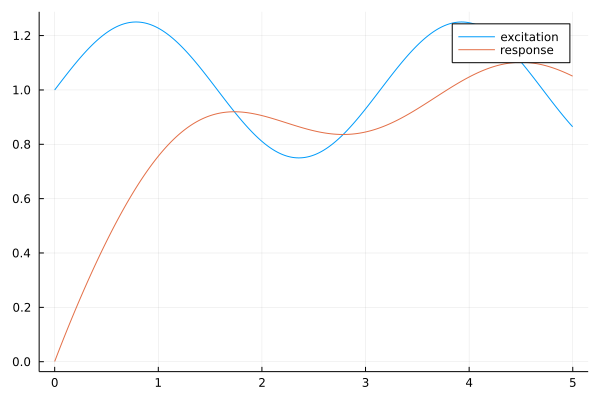

In [11]:
u = ones(size(t1)) + 0.25*sin.(2*t1)
y = simulate(G2, u, Δt1)

plot(t1, u, label="excitation")
plot!(t1, y, label="response")

## LTI Systems (Operators with rational Laplace Transforms)

The differentiation operator is a subtype of an abstract base type `LTISystem`, representing generic LTI systems. Conventional arithmetic operators work well with those systems. Therefore, we can define the following transfer functions (note that the syntax of `Romeo` is identical to the conventional one):

In [7]:
G1_1 = 1/s;
G1_2 = 1/(s+1);
G1_3 = 1/(s^2+1);

We see that `G1_1` is essentially the first order integral operator. It is also the Laplace transform of the Heaviside's step function. To verify this in `Romeo`, one must invoke the `invlaplace` function. The equivalent function to this is `impulse_resp`. These two functions are completely identical. Both of them are included because, depending on the context, one may seem more appropriate than another. The second Laplace transform, `G1_2`, is that of the exponential function, while the third one represents `sin`.

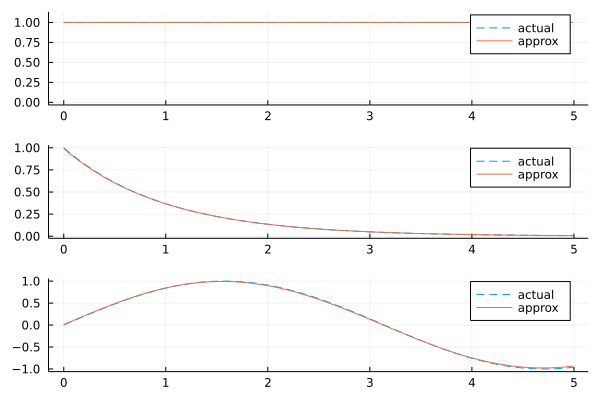

In [10]:
Δt = 0.01
t = 0:Δt:(5-Δt)
N = length(t);
p1 = plot(t, ones(size(t)), line=:dash, label="actual")
plot!(t, invlaplace(G1_1, N, Δt), ylim=[0, 1.1], label="approx")
p2 = plot(t, exp.(-t), line=:dash, label="actual")
plot!(t, invlaplace(G1_2, N, Δt), label="approx")
p3 = plot(t, sin.(t), line=:dash, label="actual")
plot!(t, invlaplace(G3, N, Δt), label="approx")
plot(p1, p2, p3, layout=(3,1))


We can also simulate more complex transfer functions, including the ones like

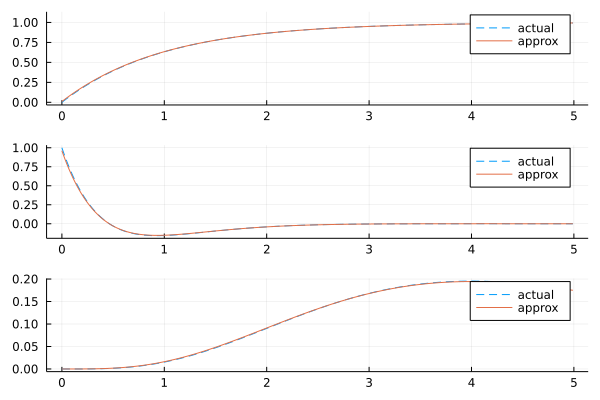

In [13]:
G1_4 = 1/s/(s+1)
G1_5 = s / (s^2 + 4*s + 5)
G1_6 = 1/(s+1)^5;

p1 = plot(t, 1 .- exp.(-t), line=:dash, label="actual")
plot!(t, invlaplace(G1_4, N, Δt), ylim=[0, 1.1], label="approx")
p2 = plot(t, exp.(-2*t) .* cos.(t) .- 2 .* exp.(-2*t) .* sin.(t), line=:dash, label="actual")
plot!(t, invlaplace(G1_5, N, Δt), label="approx")
p3 = plot(t, 1/factorial(4) .* t.^4 .* exp.(-t), line=:dash, label="actual")
plot!(t, invlaplace(G1_6, N, Δt), label="approx")
plot(p1, p2, p3, layout=(3,1))

## Real-Order LTI Systems

In [17]:
using SpecialFunctions

We can construct non-integer order systems in different ways. By raising differential operators to non-integer powers, or directly by constructing differintegral elements. The following code illustrates different ways in which a semi-integral can be computed:

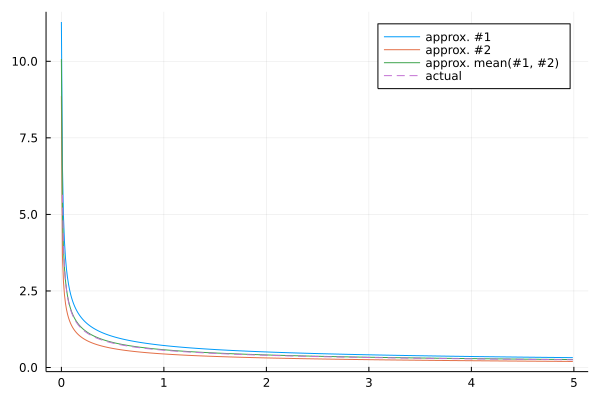

In [18]:
g1 = invlaplace(1/s^0.5, N, Δt)
g2 = invlaplace(Diff(-0.5), N, Δt)
g = (g1 .+ g2) ./ 2

plot(t, g1, label="approx. #1")
plot!(t, g2, label="approx. #2")
plot!(t, g, label="approx. mean(#1, #2)")
plot!(t, t.^(-0.5)/gamma(0.5), label="actual", line=:dash)

More complex non-integer order operators can be obtained in the usual manner. Firstly, construct a non-integer order derivative element

In [31]:
Gni1 = 1/(s^0.5+1)
gni

Diff{Float64}(0.5)

In [14]:
g1 = invlaplace(ComplexF64, 1/s^(0.5 + 0.5*im), N, Δt);
g2 = invlaplace(ComplexF64, Diff(-0.5 - 0.5*im), N, Δt);

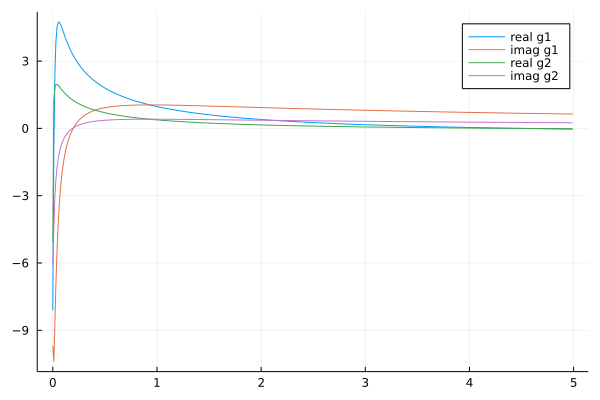

In [15]:
plot(t, real.(g1), label="real g1")
plot!(t, imag.(g1), label="imag g1")
# plot!(t, abs.(g1), line=:dash, label="")
plot!(t, real.(g2), label="real g2")
plot!(t, imag.(g2), label="imag g2")